In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Conn infra

In [3]:
#Generate root password
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))

#Download ngrok
! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip
#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null
#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config
! echo "LD_LIBRARY_PATH=/usr/lib64-nvidia" >> /root/.bashrc
! echo "export LD_LIBRARY_PATH" >> /root/.bashrc

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')

#Ask token
print("Copy authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = "00000000000000000000000000000"

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')
#Print root password
print("Root password: {}".format(password))
#Get public address
! curl -s http://localhost:4040/api/tunnels
#! curl -s http://localhost:4040/api/tunnels | python3 -c \
#    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Copy authtoken from https://dashboard.ngrok.com/auth
Root password: 000000000000
{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"tcp://0.tcp.ngrok.io:15259","proto":"tcp","config":{"addr":"localhost:22","inspect":false},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


or

# Check folders is exist

In [2]:
!pwd

/content


In [4]:
!ls -l

total 39520
-rwxr-xr-x 1 root root 26683198 Oct  8  2019 ngrok
-rw-r--r-- 1 root root 13773305 Jun  2 17:49 ngrok-stable-linux-amd64.zip
drwxr-xr-x 3 root root     4096 Jun  2 17:51 precision-agriculture-computer-vision
drwxr-xr-x 1 root root     4096 May 29 18:19 sample_data


In [0]:
!rm -rf precision-agriculture data dataset
!git clone https://github.com/yildizozan/precision-agriculture-computer-vision.git precision-agriculture && cd precision-agriculture && ls -l && sh prepare-infra.sh && ./download-dataset.sh && tree data
!pip3 install --upgrade pip
!pip3 install --upgrade setuptools
!pip3 install --upgrade image_slicer

Cloning into 'precision-agriculture'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 8), reused 7 (delta 3), pack-reused 0
Unpacking objects: 100% (20/20), done.
total 16
-rwxr-xr-x 1 root root  932 Jun  2 17:52 download-dataset.sh
-rw-r--r-- 1 root root 1070 Jun  2 17:52 LICENSE
-rw-r--r-- 1 root root  169 Jun  2 17:52 prepare-infra.sh
-rw-r--r-- 1 root root  189 Jun  2 17:52 README.md
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launch

In [0]:
import os
os.chdir('/content/precision-agriculture')
!pwd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Prepare Dataset

In [2]:
!rm -rf CA17
!wget -O CA17.zip http://lcas.lincoln.ac.uk/nextcloud/index.php/s/RYni5xngnEZEFkR/download
!unzip CA17.zip
!mv CA17/carrots_labelled/ dataset/
!rm -rf CA17

--2020-06-02 15:57:09--  http://lcas.lincoln.ac.uk/nextcloud/index.php/s/RYni5xngnEZEFkR/download
Resolving lcas.lincoln.ac.uk (lcas.lincoln.ac.uk)... 194.80.55.142
Connecting to lcas.lincoln.ac.uk (lcas.lincoln.ac.uk)|194.80.55.142|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://lcas.lincoln.ac.uk/nextcloud/index.php/s/RYni5xngnEZEFkR/download [following]
--2020-06-02 15:57:10--  https://lcas.lincoln.ac.uk/nextcloud/index.php/s/RYni5xngnEZEFkR/download
Connecting to lcas.lincoln.ac.uk (lcas.lincoln.ac.uk)|194.80.55.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272259428 (260M) [application/zip]
Saving to: ‘CA17.zip’

CA17.zip            100%[===================>] 259.65M  22.0MB/s    in 13s     

2020-06-02 15:57:23 (20.6 MB/s) - ‘CA17.zip’ saved [272259428/272259428]

Archive:  CA17.zip
   creating: CA17/
   creating: CA17/carrots_labelled/
   creating: CA17/carrots_labelled/1/
 extracting: CA17/carrots_labelled/1/

In [7]:
!pwd

/content/precision-agriculture


In [0]:
from PIL import Image

def crop_dataset_image(path):
  print(path)
  (left, upper, right, lower) = (0, 0, 2304, 1792)

  image = Image.open(path)
  cropped_img = image.crop((left, upper, right, lower))
  cropped_img.save(path)
  image.close()
  cropped_img.close()

In [0]:
!rm -rf datas/
!mkdir -p \
datas/train/img \
datas/train_mask/img \
datas/test/img \
datas/test_mask/img \
datas/validation/img \
datas/validation_mask/img
!ls -lh datas/

from PIL import Image

def cropping(filename, source, target, min, max):
  for i in range(min, max):
    print('%d/%s.png' % (i, filename))

    image = Image.open(source + '%d/%s.png' % (i, filename))

    width, height = image.size
    for row in range(0, height, 256 ):
      for col in range(0, width, 256 ):
        if (row + 256 < (height // 256 + 1) * 256 and col + 256 < (width // 256 + 1) * 256):
          cropped_img = image.crop((col, row, col + 256, row + 256))
          cropped_img.save(target + '%s_%s_%s_%s.png' % ("{:02d}".format(i), filename, "{:02d}".format(row // 256), "{:02d}".format(col // 256)) )

    image.close()
    cropped_img.close()


cropping("rgbreg_crop", "dataset/", "datas/train/img/", 1, 18)
cropping("partialc_crop", "dataset/", "datas/train_mask/img/", 1, 18)

cropping("rgbreg_crop", "dataset/", "datas/test/img/", 18, 21)
cropping("partialc_crop", "dataset/", "datas/test_mask/img/", 18, 21)

cropping("rgbreg_crop", "dataset/", "datas/validation/img/", 1, 21)
cropping("truth_crop", "dataset/", "datas/validation_mask/img/", 1, 21)

In [0]:
!rm -rf datas.zip && zip -r datas.zip datas/train/img/

In [0]:
!ls -lh datas/train/img/

In [0]:
!identify -verbose datas/train/img/1_rgbreg_crop_0_0.png

In [0]:
import image_slicer

n_tiles = 63

datasetDir = 'dataset/'

f = open("datas/train.txt", "w")
for i in range(1, 2):
  filename = '%d/rgbreg_crop.png' % i
  sourcePath = datasetDir + filename
  targetPath = "datas/" + filename
  crop_dataset_image(sourcePath, targetPath)
  print('%s processing.' % (sourcePath))
  tiles = image_slicer.slice(sourcePath, col=9, row=7, save=False)
  train_tiles = image_slicer.save_tiles(
      tiles, 
      directory='datas/train/img', 
      prefix='%s_%s' % ("{:02d}".format(i), "rgbreg_crop"), 
      format='png')
###
  filename = '%d/partialc_crop.png' % i
  sourcePath = datasetDir + filename
  targetPath = "datas/" + filename
  crop_dataset_image(sourcePath, targetPath)
  print('%s processing.' % (imgPath))
  tiles = image_slicer.slice(imgPath, col=7, row=9, save=False)
  trainannot = image_slicer.save_tiles(
      tiles, 
      directory='datas/train_mask/img', 
      prefix='%s_%s' % ("{:02d}".format(i), "partialc_crop"), 
      format='png')

  for i in range(0, 4):
    f.write('%s %s\n' % (train_tiles[i].filename, trainannot[i].filename) )
f.close()

f = open("datas/test.txt", "w")
for i in range(18, 21):
  filename = '%d/rgbreg_crop.png' % i
  sourcePath = datasetDir + filename
  targetPath = "datas/" + filename
  crop_dataset_image(sourcePath, targetPath)


  print('%s processing.' % (imgPath))
  tiles = image_slicer.slice(imgPath, number_tiles=n_tiles, col=7, row=9, save=False)
  test_tiles = image_slicer.save_tiles(
      tiles, 
      directory='datas/test/img', 
      prefix='%s_%s' % ("{:02d}".format(i), "rgbreg_crop"), 
      format='png')

  filename = '%d/partialc_crop.png' % i
  sourcePath = datasetDir + filename
  targetPath = "datas/" + filename
  crop_dataset_image(sourcePath, targetPath)

  print('%s processing.' % (imgPath))
  tiles = image_slicer.slice(imgPath, number_tiles=n_tiles, col=7, row=9, save=False)
  testannot = image_slicer.save_tiles(
      tiles, 
      directory='datas/test_mask/img', 
      prefix='%s_%s' % ("{:02d}".format(i), "partialc_crop"), 
      format='png')
  
  for i in range(0, 4):
    f.write('%s %s\n' % (test_tiles[i].filename, testannot[i].filename) )
f.close()

f = open("datas/val.txt", "w")
for i in range(1, 2):
  imgPath = datasetDir + '%d/rgbreg_crop.png' % i
  crop_dataset_image(imgPath)

  print('%s processing.' % (imgPath))
  tiles = image_slicer.slice(imgPath, number_tiles=n_tiles, col=7, row=9, save=False)
  val_tiles = image_slicer.save_tiles(
      tiles, 
      directory='datas/validation/img', 
      prefix='%s_%s' % ("{:02d}".format(i), 'rgbreg_crop'), 
      format='png')

  imgPath = datasetDir + '%d/truth_crop.png' % i
  crop_dataset_image(imgPath)

  print('%s processing.' % (imgPath))
  tiles = image_slicer.slice(imgPath, number_tiles=n_tiles, col=7, row=9, save=False)
  valannot_tiles = image_slicer.save_tiles(
      tiles, 
      directory='datas/validation_mask/img', 
      prefix='%s_%s' % ("{:02d}".format(i), 'truth_crop'), 
      format='png')
  
  for i in range(0, 4):
    f.write('%s %s\n' % (val_tiles[i].filename, valannot_tiles[i].filename) )
f.close


In [0]:
!apt install -y imagemagick

In [0]:
!identify -verbose datas/2/rgbreg_crop.png
!identify -verbose datas/2/partialc_crop.png

In [0]:
!identify -verbose datas/train/img/01_rgbreg_crop_01_01.png

In [0]:
!identify -verbose datas/train_mask/img/01_partialc_crop_01_01.png

## Check folders

In [0]:
!ls -l datas/train/img/ 

In [0]:
!du -d 1 -h datas

772K	datas/test_mask
5.3M	datas/validation_mask
80M	datas/train
14M	datas/test
94M	datas/validation
5.1M	datas/train_mask
198M	datas


or

In [0]:
!tree datas

# Segnet

All headers

In [15]:
from __future__ import absolute_import
from __future__ import print_function

import os
import glob
import cv2

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.layers import Input, Permute, Layer, MaxPooling2D, Dense, GlobalAveragePooling2D
from keras.layers.core import Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

Using TensorFlow backend.


In [16]:
def SegNet(input_shape=(256, 256, 3), classes=3, kernel=3, pool_size=(2,2)):
  img_h = input_shape[0]
  img_w = input_shape[1]

  #new_input_shape = (input_shape[2], input_shape[1], input_shape[0])

  model = Sequential()
  model.add(Layer(input_shape=input_shape))
  
  encoding_layers = [
      Conv2D(64, kernel, padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(64, kernel, padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

      Conv2D(128, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(128, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

  ]

  decoding_layers = [
      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      
      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      
      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(128, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(128, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(64, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(64, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),

  ]

  for l in encoding_layers:
      model.add(l)
      #print(l.input_shape,l.output_shape,l)

  for l in decoding_layers:
      model.add(l)
      #print(l.input_shape,l.output_shape,l)

  model.add(Conv2D(classes, (1, 1), padding='valid'))
  #model.add(GlobalAveragePooling2D())

  #model.add(Reshape((256*256, classes), input_shape=input_shape))
  #model.add(Permute((2, 1)))
  model.add(Activation('softmax'))
  
  model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

  return model


input_shape = (256, 256, 3)
n_labels = 3
epochs = 100

model = SegNet(classes=n_labels)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Layer)              (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 64)      256       
______________________________________

# Packt Example

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Permute, Layer, Activation, ZeroPadding2D, Conv2D, BatchNormalization, MaxPooling2D

input_height = 256
input_width = 256
kernel = 3
filter_size = 128
pad = 1
pool_size = 2

model = Sequential()
model.add(Layer(input_shape=(3, input_height, input_width)))

# encoder
model.add(ZeroPadding2D(padding=(pad, pad)))
model.add(Conv2D(filter_size, (kernel, kernel), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(ZeroPadding2D(padding=(pad, pad)))
model.add(Conv2D(128, (kernel, kernel), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size), data_format="channels_first"))

model.add(ZeroPadding2D(padding=(pad, pad)))
model.add(Conv2D(256, (kernel, kernel), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(ZeroPadding2D(padding=(pad, pad)))
model.add(Conv2D(512, (kernel, kernel), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# decoder
model.add(ZeroPadding2D(padding=(pad, pad)))
model.add(Conv2D(512, (kernel, kernel), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(UpSampling2D(size=(pool_size, pool_size)))
model.add(ZeroPadding2D(padding=(pad, pad)))
model.add(Conv2D(256, (kernel, kernel), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(UpSampling2D(size=(pool_size, pool_size)))
model.add(ZeroPadding2D(padding=(pad, pad)))
model.add(Conv2D(128, (kernel, kernel), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(UpSampling2D(size=(pool_size, pool_size)))
model.add(ZeroPadding2D(padding=(pad, pad)))
model.add(Conv2D(filter_size, (kernel, kernel), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(nClasses, (1, 1), padding='valid', ))

model.outputHeight = model.output_shape[-2]
model.outputWidth = model.output_shape[-1]

model.add(Reshape((nClasses, model.output_shape[-2] * model.output_shape[-1]),
                  input_shape=(nClasses, model.output_shape[-2], model.output_shape[-1])))

model.add(Permute((2, 1)))
model.add(Activation('softmax'))

# compile model
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.002), metrics=["accuracy"])

# use ReduceLROnPlateau to adjust the learning rate
reduceLROnPlat = ReduceLROnPlateau(monitor='val_acc', factor=0.75, patience=5,
                      min_delta=0.005, mode='max', cooldown=3, verbose=1)

callbacks_list = [reduceLROnPlat]

# fit the model
history = model.fit(train_data, train_label, callbacks=callbacks_list,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, shuffle = True, validation_data = (val_data, val_label))

ValueError: ignored

# Prepare Dataset

## Keras ImageDataGenerator

In [0]:
!cp -r /content/gdrive/My\ Drive/dataset/carrot17 /content/

In [0]:
!cp -r /content/gdrive/My\ Drive/dataset/carrot17/2/train  /content/gdrive/My\ Drive/dataset/carrot17/2/validation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

seed=1

basedir = "datas/"
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)

train_image_generator = train_datagen.flow_from_directory(
    basedir + 'train',
    target_size=(256, 256),
    class_mode=None,
    batch_size=9,
    seed=seed,
    )

train_mask_generator = train_datagen.flow_from_directory(
    basedir + 'train_mask',
    target_size=(256, 256),
    class_mode=None,
    batch_size=9,
    seed=seed
    )

train_data = zip(train_image_generator, train_mask_generator)

Found 1071 images belonging to 1 classes.
Found 1071 images belonging to 1 classes.


In [0]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_image_generator = val_datagen.flow_from_directory(
    basedir + 'validation',
    target_size=(256, 256),
    class_mode=None,
    batch_size=9,
    seed=seed
    )

val_mask_generator = val_datagen.flow_from_directory(
    basedir + 'validation_mask',
    target_size=(256, 256),
    class_mode=None,
    batch_size=9,
    seed=seed
    )

validation_data = zip(val_image_generator, val_mask_generator)

Found 1260 images belonging to 1 classes.
Found 1260 images belonging to 1 classes.


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_image_generator = train_datagen.flow_from_directory(
    basedir + 'test',
    target_size=(256, 256),
    class_mode=None,
    batch_size=9,
    seed=seed
    )

test_mask_generator = train_datagen.flow_from_directory(
    basedir + 'test_mask',
    target_size=(256, 256),
    class_mode=None,
    batch_size=9,
    seed=seed
    )

test_data = zip(test_image_generator, test_mask_generator)

Found 189 images belonging to 1 classes.
Found 189 images belonging to 1 classes.


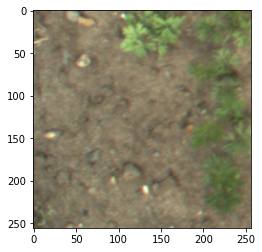

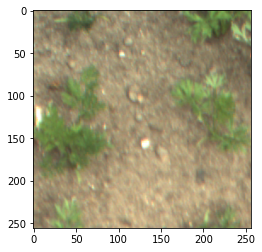

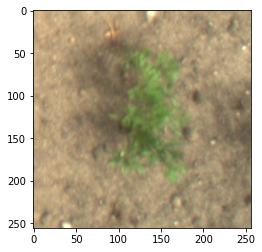

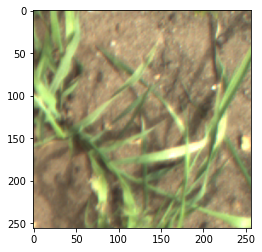

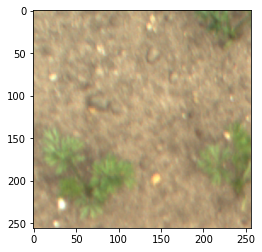

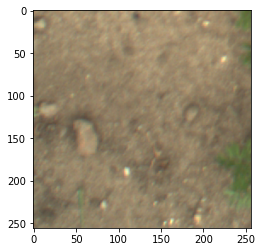

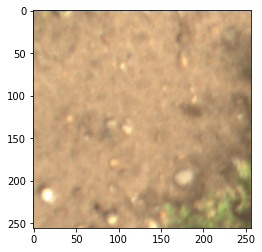

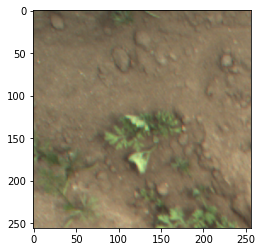

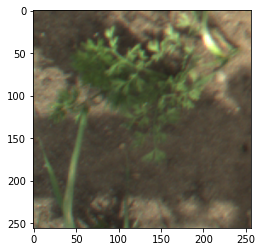

IndexError: ignored

In [0]:
x = val_image_generator.next()
for i in range(0, x.size - 1):
    image = x[i]
    plt.imshow(image)
    plt.show()

## Yeni dataset

### All dataset

In [24]:
# we create two instances with the same arguments
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_datagen.fit((4, 256, 256, 3), augment=True, seed=seed)
mask_datagen.fit((4, 256, 256, 3), augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    'data/train',
    class_mode=None,
    seed=seed)

mask_generator = mask_datagen.flow_from_directory(
    'data/trainannot',
    class_mode=None,
    seed=seed)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

model.fit_generator(
    train_generator,
    steps_per_epoch=2000,
    epochs=50)

ValueError: ignored

### Basic Dataset

In [19]:
seed=1

data_gen = ImageDataGenerator(rescale=1./255)

image_generator = data_gen.flow_from_directory(
    'data/train/', 
    target_size=(256, 256),
    class_mode=None,
    batch_size=4,
    seed=seed)
imageannot_generator = data_gen.flow_from_directory(
    'data/trainannot/', 
    target_size=(256, 256), 
    class_mode=None,
    batch_size=4,
    seed=seed)
v = zip(image_generator, imageannot_generator)

Found 16 images belonging to 1 classes.
Found 16 images belonging to 1 classes.


In [0]:
x = image_generator.next()
for i in range(0):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [21]:
seed=1

data_gen = ImageDataGenerator(rescale=1./255)

val_generator = data_gen.flow_from_directory(
    'data/val/', 
    target_size=(256, 256),
    class_mode=None,
    batch_size=4,
    seed=seed)
valannot_generator = data_gen.flow_from_directory(
    'data/valannot/', 
    target_size=(256, 256), 
    class_mode=None,
    batch_size=4,
    seed=seed)
validation_data = zip(val_generator, valannot_generator)


Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.


In [0]:
x = val_generator.next()
for i in range(0):
    image = x[i]
    plt.imshow(image)
    plt.show()

# Train

In [18]:
!ls -lh datas/train/img | wc -l

1072


In [23]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model
history = model.fit_generator(
    train_data, 
    steps_per_epoch=1071/9, 
    validation_data=validation_data,
    validation_steps=1260/9,
    epochs=100,
    verbose=1,
    callbacks=callbacks_list
    )

NameError: ignored

In [0]:
for key in ['loss', 'val_loss']:
    plt.plot(history.history[key],label=key)
plt.legend()
plt.show()

NameError: ignored

In [0]:
score = model.evaluate(test_image_generator, test_mask_generator, verbose=2)

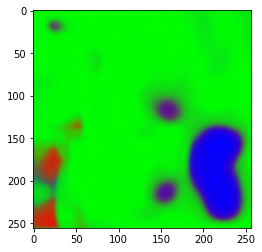

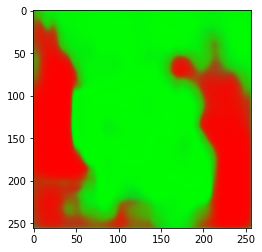

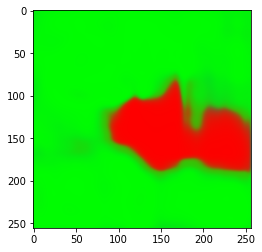

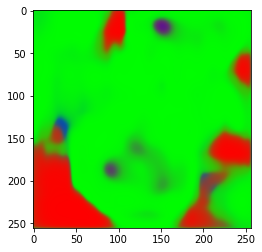

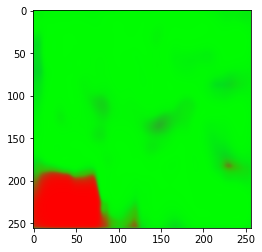

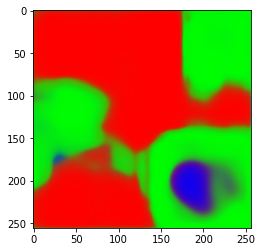

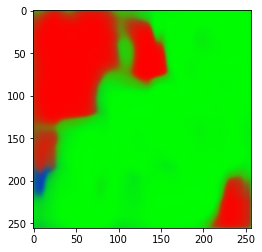

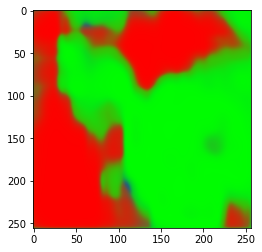

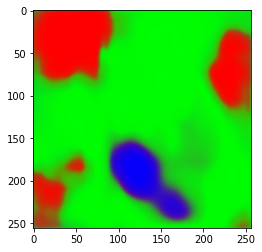

In [0]:
predict = model.predict(test_image_generator)
for i in range(len(predict)):
  plt.imshow(predict[i])
  plt.show()

In [0]:

for i in range(10):
    img_is  = (X_test[i] + 1)*(255.0/2)
    seg = y_predi[i]
    segtest = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is/255.0)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img(segtest,n_classes))
    ax.set_title("true class")
    plt.show()

NameError: ignored

# Custom Generator

In [0]:
import cv2
import random

def data_generator(img_folder, mask_folder, batch_size):
  c = 1
  n = os.listdir(img_folder) #List of training images
  random.shuffle(n)
  
  while (True):
    img = np.zeros((batch_size, 2, 2, 3)).astype('float')
    mask = np.zeros((batch_size, 2, 2, 3)).astype('float')
    print(img)
    for i in range(c, c + batch_size): #initially from 0 to 16, c = 0. 

      train_img = cv2.imread('%s/%s/rgbreg_crop.png' % (img_folder, n[i]))/255.
      train_img = cv2.resize(train_img, (256, 256))# Read an image from folder and resize
      
      img[i-c] = train_img #add to array - img[0], img[1], and so on.
                                         

      train_mask = cv2.imread('%s/%s/partialc_crop.png' % (mask_folder, n[i]))/255.
      train_mask = cv2.resize(train_mask, (256, 256))
  
      mask[i-c] = train_mask

    c+=batch_size
    if(c+batch_size>=len(os.listdir(img_folder))):
      c=0
      random.shuffle(n)
                  # print "randomizing again"
    yield img, mask


def val_generator(img_folder, mask_folder, batch_size):
  c = 1
  n = os.listdir(img_folder) #List of training images
  random.shuffle(n)
  
  while (True):
    img = np.zeros((batch_size, 256, 256, 3)).astype('float')
    mask = np.zeros((batch_size, 256, 256, 3)).astype('float')
    print(img)
    for i in range(c, c + batch_size): #initially from 0 to 16, c = 0. 

      train_img = cv2.imread('%s/%d/rgbreg_crop.png' % (img_folder, n[i]))/255.
      train_img = cv2.resize(train_img, (256, 256))# Read an image from folder and resize
      
      img[i-c] = train_img #add to array - img[0], img[1], and so on.
                                                   

      train_mask = cv2.imread('%s/%d/truth_crop.png' % (mask_folder, n[i]))/255.
      train_mask = cv2.resize(train_mask, (256, 256))

      mask[i-c] = train_mask

    c+=batch_size
    if(c+batch_size>=len(os.listdir(img_folder))):
      c=0
      random.shuffle(n)
                  # print "randomizing again"
    yield img, mask


#train_frame_path = '/content/dataset/train/'
#train_mask_path = '/content/data/trainannot/'

#val_frame_path = '/content/data/val'
#val_mask_path = '/content/data/valannot'


train_frame_path = '/content/dataset'
train_mask_path = '/content/dataset'

val_frame_path = '/content/dataset'
val_mask_path = '/content/dataset'

# Train the model
train_gen = data_generator(train_frame_path,train_mask_path, batch_size=batch_size)
val_gen = val_generator(val_frame_path,val_mask_path, batch_size=batch_size)

# Train

In [0]:
model.fit_generator(
        train_gen,
        epochs=epochs,
        steps_per_epoch=20/batch_size,
        validation_data=val_gen,
        validation_steps=20/batch_size)

# Finish!

In [0]:
!ls -l /content/data/

total 296
drwxr-xr-x 2 root root  4096 Mar 31 14:30 test
drwxr-xr-x 2 root root  4096 Mar 31 14:30 testannot
-rw-r--r-- 1 root root   948 Mar 31 14:35 test.txt
drwxr-xr-x 2 root root 65536 Mar 31 14:35 train
drwxr-xr-x 2 root root 73728 Mar 31 14:35 trainannot
-rw-r--r-- 1 root root  5372 Mar 31 14:35 train.txt
drwxr-xr-x 2 root root 65536 Mar 31 14:36 val
drwxr-xr-x 2 root root 61440 Mar 31 14:36 valannot
-rw-r--r-- 1 root root     0 Mar 31 14:35 val.txt


In [0]:
!head /content/CA17/carrots_labelled/data/train.txt

data/train/01_rgbreg_crop_01_01.png data/trainannot/01_partialc_crop_01_01.png
data/train/01_rgbreg_crop_01_02.png data/trainannot/01_partialc_crop_01_02.png
data/train/01_rgbreg_crop_01_03.png data/trainannot/01_partialc_crop_01_03.png
data/train/01_rgbreg_crop_01_04.png data/trainannot/01_partialc_crop_01_04.png
data/train/02_rgbreg_crop_01_01.png data/trainannot/02_partialc_crop_01_01.png
data/train/02_rgbreg_crop_01_02.png data/trainannot/02_partialc_crop_01_02.png
data/train/02_rgbreg_crop_01_03.png data/trainannot/02_partialc_crop_01_03.png
data/train/02_rgbreg_crop_01_04.png data/trainannot/02_partialc_crop_01_04.png
data/train/03_rgbreg_crop_01_01.png data/trainannot/03_partialc_crop_01_01.png
data/train/03_rgbreg_crop_01_02.png data/trainannot/03_partialc_crop_01_02.png


In [0]:
import imageio
import numpy as np
from keras.utils import to_categorical

num_classes=3

def read_image_batch(data_path,batch_size):
    while True:
        image_list = open(data_path).readlines()
        l=len(image_list)
        print(image_list)
        num_batch=l//batch_size
        if num_batch*batch_size<l:
            num_batch+=1
        for i in range(num_batch):
            batch_set=image_list[batch_size*i:min(batch_size*(i+1),l)]
            batch_set=[bs.strip().split() for bs in batch_set]
            X=np.array([imageio.imread(line[0][1:]) for line in batch_set])
            labels=np.array([imageio.imread(line[1][1:]) for line in batch_set])
            y=to_categorical(labels, num_classes)
            yield tuple((X, y))

Using TensorFlow backend.


In [0]:
import os
import sys
from skimage.io import imread
import numpy as np

# img_width=303
# img_height=248
img_w = 256
img_h = 256
n_labels = 3

def label_map(labels):
    label_map = np.zeros([img_h, img_w, n_labels])    
    for r in range(img_h):
        for c in range(img_w):
            label_map[r, c, labels[r][c]] = 1
    return label_map


def prep_data(rootDir):
  data = []
  label = []
  n = n_train = 3

  i = 0
  for filename in os.listdir(rootDir):
    img, gt = [imread(rootDir + filename)], np.clip(imread(rootDir + filename), 0, 1)
    data.append(img)
    label.append(label_map(gt))
    sys.stdout.write('\r')
    sys.stdout.write("train: [%-20s] %d%%" % ('=' * int(20. * (i + 1) / n - 1) + '>',
                                                    int(100. * (i + 1) / n)))
    sys.stdout.flush()
    i += 1
  
  sys.stdout.write('\r')
  sys.stdout.flush()
  data, label = np.array(data), np.array(label).reshape((n, img_h * img_w, n_labels))

  print('OK')
  print('\tshapes: {}, {}'.format(data.shape, label.shape))
  print('\ttypes:  {}, {}'.format(data.dtype, label.dtype))
  print('\tmemory: {}, {} MB'.format(data.nbytes / 1048576, label.nbytes / 1048576))

  return data, label


test_data, test_label = prep_data("/content/CA17/carrots_labelled/data/train/")
print(test_data)
print(test_label)

FileNotFoundError: ignored

In [0]:
!ls data/train

In [0]:
# new new
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_image_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(256, 256),
    batch_size = 16)

train_mask_generator = train_datagen.flow_from_directory(
    'data/trainannot',
    target_size=(256, 256),
    batch_size = 16)

val_image_generator = val_datagen.flow_from_directory(
    'data/val',
    target_size=(256, 256),
    batch_size = 16)

val_mask_generator = val_datagen.flow_from_directory(
    'data/valannot',
    target_size=(256, 256),
    batch_size = 16)

train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [0]:
results = m.fit_generator(train_generator, epochs=NO_OF_EPOCHS, 
                          train_generator = (NO_OF_TRAINING_IMAGES//BATCH_SIZE),
                          validation_data=val_generator, 
                          validation_steps=(NO_OF_VAL_IMAGES//BATCH_SIZE), 
                          callbacks=callbacks_list)
m.save('Model.h5')

# Image data generator for segmentation

In [0]:
!pwd
!ls -l
!ls -l dataset/
!ls -l data/

#!rm -rf data
!mkdir -p data/train/img data/trainannot/img data/test/img data/testannot/img data/val/img data/valannot/img
#!ls -l data

# Train & Test
!cp dataset/1/rgbreg_crop.png data/train/img/
!cp dataset/2/rgbreg_crop.png data/train/img/
!cp dataset/3/rgbreg_crop.png data/train/img/
!cp dataset/4/rgbreg_crop.png data/train/img/
!cp dataset/5/rgbreg_crop.png data/train/img/
!cp dataset/6/rgbreg_crop.png data/train/img/
!cp dataset/7/rgbreg_crop.png data/train/img/
!cp dataset/8/rgbreg_crop.png data/train/img/
!cp dataset/9/rgbreg_crop.png data/train/img/
!cp dataset/10/rgbreg_crop.png data/train/img/
!cp dataset/11/rgbreg_crop.png data/train/img/
!cp dataset/12/rgbreg_crop.png data/train/img/
!cp dataset/13/rgbreg_crop.png data/train/img/
!cp dataset/14/rgbreg_crop.png data/train/img/
!cp dataset/15/rgbreg_crop.png data/train/img/
!cp dataset/16/rgbreg_crop.png data/train/img/

!cp dataset/17/rgbreg_crop.png data/test/img/
!cp dataset/18/rgbreg_crop.png data/test/img/
!cp dataset/19/rgbreg_crop.png data/test/img/
!cp dataset/20/rgbreg_crop.png data/test/img/

# Train & Test labelled
!cp dataset/1/partialc_crop.png data/train/img/
!cp dataset/2/partialc_crop.png data/train/img/
!cp dataset/3/partialc_crop.png data/train/img/
!cp dataset/4/partialc_crop.png data/train/img/
!cp dataset/5/partialc_crop.png data/train/img/
!cp dataset/6/partialc_crop.png data/train/img/
!cp dataset/7/partialc_crop.png data/train/img/
!cp dataset/8/partialc_crop.png data/train/img/
!cp dataset/9/partialc_crop.png data/train/img/
!cp dataset/10/partialc_crop.png data/train/img/
!cp dataset/11/partialc_crop.png data/train/img/
!cp dataset/12/partialc_crop.png data/train/img/
!cp dataset/13/partialc_crop.png data/train/img/
!cp dataset/14/partialc_crop.png data/train/img/
!cp dataset/15/partialc_crop.png data/train/img/
!cp dataset/16/partialc_crop.png data/train/img/

!cp dataset/17/partialc_crop.png data/test/img/
!cp dataset/18/partialc_crop.png data/test/img/
!cp dataset/19/partialc_crop.png data/test/img/
!cp dataset/20/partialc_crop.png data/test/img/

# Validation
!cp dataset/1/truth_crop.png data/val/img/
!cp dataset/2/truth_crop.png data/val/img/
!cp dataset/3/truth_crop.png data/val/img/
!cp dataset/4/truth_crop.png data/val/img/
!cp dataset/5/truth_crop.png data/val/img/
!cp dataset/6/truth_crop.png data/val/img/
!cp dataset/7/truth_crop.png data/val/img/
!cp dataset/8/truth_crop.png data/val/img/
!cp dataset/9/truth_crop.png data/val/img/
!cp dataset/10/truth_crop.png data/val/img/
!cp dataset/11/truth_crop.png data/val/img/
!cp dataset/12/truth_crop.png data/val/img/
!cp dataset/13/truth_crop.png data/val/img/
!cp dataset/14/truth_crop.png data/val/img/
!cp dataset/15/truth_crop.png data/val/img/
!cp dataset/16/truth_crop.png data/val/img/

!cp dataset/17/truth_crop.png data/val/img/
!cp dataset/18/truth_crop.png data/val/img/
!cp dataset/19/truth_crop.png data/val/img/
!cp dataset/20/truth_crop.png data/val/img/

# Valannot
!cp dataset/1/truth_crop.png data/valannot/img/
!cp dataset/2/truth_crop.png data/valannot/img/
!cp dataset/3/truth_crop.png data/valannot/img/
!cp dataset/4/truth_crop.png data/valannot/img/
!cp dataset/5/truth_crop.png data/valannot/img/
!cp dataset/6/truth_crop.png data/valannot/img/
!cp dataset/7/truth_crop.png data/valannot/img/
!cp dataset/8/truth_crop.png data/valannot/img/
!cp dataset/9/truth_crop.png data/valannot/img/
!cp dataset/10/truth_crop.png data/valannot/img/
!cp dataset/11/truth_crop.png data/valannot/img/
!cp dataset/12/truth_crop.png data/valannot/img/
!cp dataset/13/truth_crop.png data/valannot/img/
!cp dataset/14/truth_crop.png data/valannot/img/
!cp dataset/15/truth_crop.png data/valannot/img/
!cp dataset/16/truth_crop.png data/valannot/img/

!cp dataset/17/truth_crop.png data/valannot/img/
!cp dataset/18/truth_crop.png data/valannot/img/
!cp dataset/19/truth_crop.png data/valannot/img/
!cp dataset/20/truth_crop.png data/valannot/img/

# Başka bir şey